# Research Proposal

### Data source: https://stat.taiwan.net.tw/

This is a research proposal about how the Chinese Tourism Ban impact Taiwan Tourism Industry. 

On May 20th 2016, Tsai Ing-Wen became the new President of Taiwan. Since then she proposed a strong Taiwan identity and Taiwan as an independent country. The tension between Taiwan and Beijing had increased since then. Afterward, an unannounced ban to Taiwan is issued. Number of Chinese tourist group to Taiwan had decrease and impacted Taiwan leisure industry. 

This proposal will look into how number of tourists decreased over time and hypothesis test will be performed on the number Chinese tourists before and after May 2016.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('TAIWAN_Visitor_Stat.csv')

# Data Explore and Clean Up

Below are some codes I used to explore the data set and clean up the data set.

In [3]:
df.info() # Check how the data set looks like

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17481 entries, 0 to 17480
Data columns (total 5 columns):
年別      17481 non-null object
月份      17481 non-null object
國家名稱    17481 non-null object
觀光      17481 non-null object
小計      17481 non-null object
dtypes: object(5)
memory usage: 682.9+ KB


In [4]:
# Above information shows that the column head is represented in Chinese. We need to drop those columns and replace
# it with English column heads. 
new_df = df.drop([0,0])
new_df.columns = ['Year','Month','CountryName','Leisure','subtotal']

In [5]:
new_df.info() # Check data set with new column heads

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17480 entries, 1 to 17480
Data columns (total 5 columns):
Year           17480 non-null object
Month          17480 non-null object
CountryName    17480 non-null object
Leisure        17480 non-null object
subtotal       17480 non-null object
dtypes: object(5)
memory usage: 819.4+ KB


In [6]:
new_df.head() # Check if there are other elements in the data set that we need to clean up. 

,Year,Month,CountryName,Leisure,subtotal
1,100,1,日本(Japan),68640,68640
2,100,1,韓國(Korea),13436,13436
3,100,1,北韓(Democratic People's Republic of Korea),0,0
4,100,1,香港(Hong Kong),24951,24951
5,100,1,中國大陸(Mainland China),69384,69384


In [7]:
# Above information shows that there are Chinese characters inside the CountryName column, and brackets as well. 
# We need to remove those Chinese characters and brackets. 

new_df['CountryName']=new_df['CountryName'].str.replace(r'[^\x00-\x7F]+','') # Remove Chinese characters

new_df['CountryName']=new_df['CountryName'].str.strip('()') # Remove brackets. 

In [8]:
new_df['CountryName'].head() # Check the CountryName column and see if we clean it up properly. 

1                                    Japan
2                                    Korea
3    Democratic People's Republic of Korea
4                                Hong Kong
5                           Mainland China
Name: CountryName, dtype: object

In [9]:
# Also, the year in the data set is based on a Taiwan Year, which is different than the standard year. 
# We need to replace the Taiwan year with the standard one. 
new_df['Year']=new_df['Year'].str.replace('100','2011').replace('101','2012').replace('102','2013').replace('103','2014').replace('104','2015').replace('105','2016').replace('106','2017').replace('107','2018')

In [10]:
new_df.head()# Check again and see if the year column is represented properly. 

,Year,Month,CountryName,Leisure,subtotal
1,2011,1,Japan,68640,68640
2,2011,1,Korea,13436,13436
3,2011,1,Democratic People's Republic of Korea,0,0
4,2011,1,Hong Kong,24951,24951
5,2011,1,Mainland China,69384,69384


In [11]:
# Now we need to change all column types. 
new_df['Year']=new_df['Year'].astype('str')
new_df['Month']=new_df['Month'].astype('int32')
new_df['CountryName']=new_df['CountryName'].astype('str')
new_df['Leisure']=new_df['Leisure'].astype('int32')
new_df['subtotal']=new_df['subtotal'].astype('int32')

new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17480 entries, 1 to 17480
Data columns (total 5 columns):
Year           17480 non-null object
Month          17480 non-null int32
CountryName    17480 non-null object
Leisure        17480 non-null int32
subtotal       17480 non-null int32
dtypes: int32(3), object(2)
memory usage: 614.5+ KB


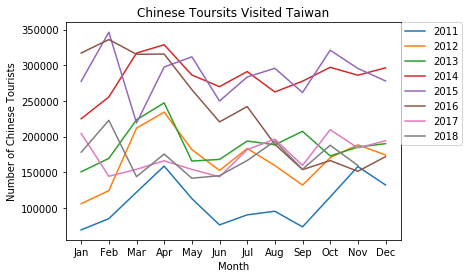

In [14]:
# Get a basic line plot and see how the number of Chinese tourists changes over year. 
ax=sns.lineplot(x='Month',y='Leisure', label='2011', data=new_df.loc[(new_df['CountryName']=='Mainland China') & (new_df['Year']=='2011')])
ax=sns.lineplot(x='Month',y='Leisure', label='2012', data=new_df.loc[(new_df['CountryName']=='Mainland China') & (new_df['Year']=='2012')])
ax=sns.lineplot(x='Month',y='Leisure', label='2013', data=new_df.loc[(new_df['CountryName']=='Mainland China') & (new_df['Year']=='2013')])
ax=sns.lineplot(x='Month',y='Leisure', label='2014', data=new_df.loc[(new_df['CountryName']=='Mainland China') & (new_df['Year']=='2014')])
ax=sns.lineplot(x='Month',y='Leisure', label='2015', data=new_df.loc[(new_df['CountryName']=='Mainland China') & (new_df['Year']=='2015')])
ax=sns.lineplot(x='Month',y='Leisure', label='2016', data=new_df.loc[(new_df['CountryName']=='Mainland China') & (new_df['Year']=='2016')])
ax=sns.lineplot(x='Month',y='Leisure', label='2017', data=new_df.loc[(new_df['CountryName']=='Mainland China') & (new_df['Year']=='2017')])
ax=sns.lineplot(x='Month',y='Leisure', label='2018', data=new_df.loc[(new_df['CountryName']=='Mainland China') & (new_df['Year']=='2018')])
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.title('Chinese Toursits Visited Taiwan')
mon_label = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.xticks(range(1,13), mon_label)
ax.set(xlabel = 'Month', ylabel = 'Number of Chinese Tourists')

plt.show()

In [15]:
# Let's focus on 2015, 2016, and 2017 tourists data. 
data_2015 = new_df.loc[new_df['Year']=='2015'].groupby(['CountryName'],as_index=False).sum() # group data based on country name. 

data_2016 = new_df.loc[new_df['Year']=='2016'].groupby(['CountryName'],as_index=False).sum()

data_2017 = new_df.loc[new_df['Year']=='2017'].groupby(['CountryName'],as_index=False).sum()

In [16]:
sorted_2015 = data_2015.sort_values(by='Leisure',ascending=False) # sort data based on number of Leisures. 

sorted_2016 = data_2016.sort_values(by='Leisure',ascending=False)

sorted_2017 = data_2017.sort_values(by='Leisure',ascending=False)

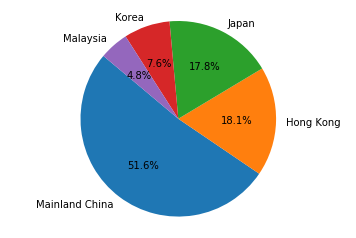

In [17]:
# Generate pie chart and see the percentage of Top 7 countries tourists number on 2015
labels_2015 = sorted_2015['CountryName'].head(5)
sizes_2015 = sorted_2015['Leisure'].head(5)

# Plot
plt.pie(sizes_2015,labels=labels_2015,autopct='%1.1f%%',shadow=False,startangle=140)
 
plt.axis('equal')
plt.show()

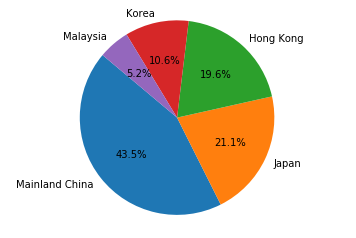

In [18]:
# Generate pie chart and see the percentage of Top 7 countries tourists number on 2016
labels_2016 = sorted_2016['CountryName'].head(5)
sizes_2016 = sorted_2016['Leisure'].head(5)
 
# Plot
plt.pie(sizes_2016,labels=labels_2016,autopct='%1.1f%%',shadow=False,startangle=140)
 
plt.axis('equal')
plt.show()

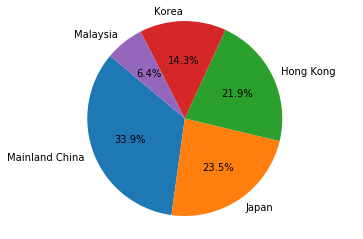

In [19]:
# Generate pie chart and see the percentage of Top 7 countries tourists number on 2017
labels_2017 = sorted_2017['CountryName'].head(5)
sizes_2017 = sorted_2017['Leisure'].head(5)
 
# Plot
plt.pie(sizes_2017,labels=labels_2017,autopct='%1.1f%%',shadow=False,startangle=140)
 
plt.axis('equal')
plt.show()

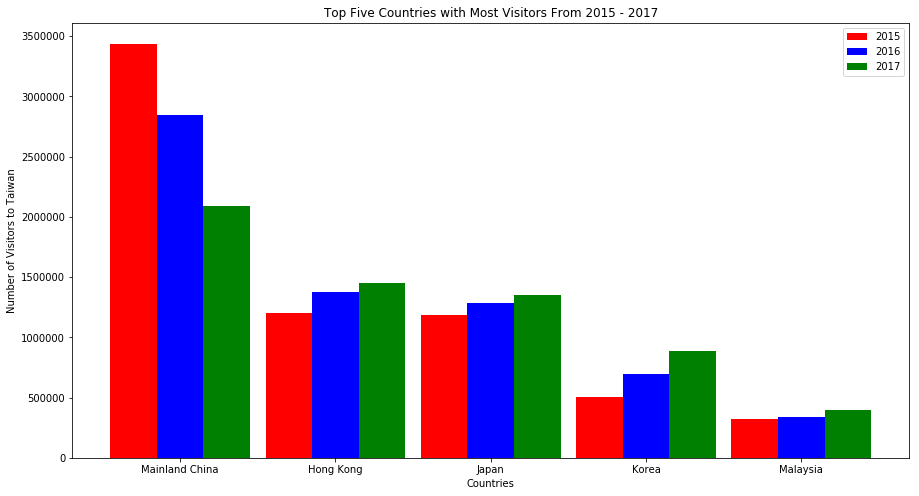

In [20]:
plt.figure(figsize=(15,8))
bar_width=0.3
x=np.arange(5)
plt.bar(x-0.3, sizes_2015, width=bar_width, color='red', label='2015')
plt.bar(x, sizes_2016, width=bar_width, color='blue', label='2016')
plt.bar(x+0.3, sizes_2017, width=bar_width, color='green', label='2017')
plt.legend(loc='upper right')
plt.xticks(range(5),labels_2015)
plt.xlabel('Countries')
plt.ylabel('Number of Visitors to Taiwan')
plt.title('Top Five Countries with Most Visitors From 2015 - 2017')
plt.show()

### Finding

According to these 3 pie charts above, we can clearly see that number of tourists from Mainland China is decreasing from 2015 to 2017. From 2015 to 2017, the percentage of tourists from Mainland China had decreased from 48.5% to 31.3%, which is decreased 17.2%. However, from above pie charts, it also shows that tourists from Japan, Hong Kong, and other regions had been increasing from 2015 to 2017. It may present a feeling that the Taiwan tourism industry may not been impacted so much by the ban. However, more detail are needed to confirm. 

### Further Research Proposal

1. Even thought pie charts shows that Chinese tourists are decreasing over years, we did not know if the total number tourists entered Taiwan are decreased or not. Therefore, we need to find out if the total number of tourists entered Taiwan for each year. 

2. We do not have the information regards to tourist consumption. Tourist consumption is a way to check how much money are spended by specific group of tourist. This is an improtant feacture that we used to see how much the Chinese tourists contributed to the Taiwan tourism industry. 

3. Once we find out the tourist consumption of the Chinese tourists by each year, or each month, then we can run a hypothesis test to check whether decrease of Chinese tourists (due to the Chinese tourism ban) is impacting the Taiwan tourism industry. 

4. This hypothesis test can run for the second half of 2016 (Like June - December, after the new presidency), if the second half of 2016 does not see a significant impact, then we can expand the test to the whole year of 2017. 